In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import dataset

In [2]:
import pandas as pd

df =pd.read_csv("drive/My Drive/fer2013/icml_face_data.csv")
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
!pip install -U -q tensorflow-addons

     |████████████████████████████████| 1.1 MB 664 kB/s 


In [4]:
#!pip install tensorflow-gpu==2.8.0

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)

from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_addons as tfa




In [6]:
df[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

Training is training set, PrivateTest is validation set, and PublicTest is testing set

In [7]:
train_df = df[df[' Usage']=='Training']
#train_df.columns['emotion']
val_df = df[df[' Usage']=='PrivateTest']
test_df = df[df[' Usage']=='PublicTest']

Separate the features and labels in set

In [8]:

def split_features_labels(name,mode):
  labels = "fer2013_" + mode + "labels"

  labels = name.pop('emotion').to_frame()
  name.columns=['Usage','pixels']
  print(type(name))
  #print(fer2013_train_features['pixels'])
  name.pop('Usage')
  labels.columns = ['emotion']
  name.reset_index(drop=True,inplace = True)
  labels.reset_index(drop=True,inplace=True)
  return name,labels
  #fer2013_train_features

split features and labels for training, validation, and testing set

In [9]:
fer2013_train_features = train_df.copy()
fer2013_val_features = val_df.copy()
fer2013_test_features = test_df.copy()
fer2013_train_features,fer2013_train_labels = split_features_labels(fer2013_train_features,"train")
fer2013_val_features,fer2013_val_labels = split_features_labels(fer2013_val_features,"val")
fer2013_test_features,fer2013_test_labels = split_features_labels(fer2013_test_features,"test")

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
fer2013_test_features

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
3584,178 176 172 173 173 174 176 173 166 166 206 22...
3585,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...
3586,255 255 255 255 255 255 255 255 255 255 255 25...
3587,33 25 31 36 36 42 69 103 132 163 175 183 187 1...


In [11]:
fer2013_train_labels.head()

,emotion
0,0
1,0
2,2
3,4
4,6


In [12]:
fer2013_train_features

,pixels
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...
28704,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,114 112 113 113 111 111 112 113 115 113 114 11...
28706,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


Counting the total number of examples for each type of class(total classes = 7)

In [13]:
classes = sorted(fer2013_train_labels['emotion'].unique())
print("total number of classes: ",len(classes))
#print(classes)
distribution = fer2013_train_labels.groupby('emotion')['emotion'].value_counts().to_dict()
distribution

total number of classes:  7


{(0, 0): 3995,
 (1, 1): 436,
 (2, 2): 4097,
 (3, 3): 7215,
 (4, 4): 4830,
 (5, 5): 3171,
 (6, 6): 4965}

Plot showing distribution of the seven classes

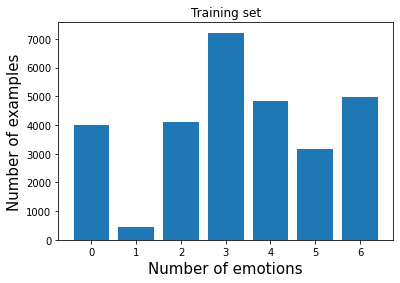

In [14]:

plt.bar(classes, [distribution[(i, i)] for i in classes])
plt.xlabel('Number of emotions', fontsize=15)
plt.ylabel('Number of examples', fontsize=15)
plt.xticks(classes, classes, fontsize=10)
plt.title('Training set')
plt.show()

Splitting the features and labels from strings into a numpy array of type unint8

In [15]:
# X_train = np.array(fer2013_features, dtype = 'uint8')
# y_train = np.array(fer2013_labels, dtype = 'uint8')
X_train = []
for index, row in fer2013_train_features.iterrows():
  temp = row['pixels'].split(" ")
  X_train.append(np.array(temp))
print(len(X_train))
X_train = np.array(X_train, dtype = 'uint8')
y_train = fer2013_train_labels.to_numpy(dtype = 'uint8')
print("shape of y_train:",y_train.shape)
print("shape of X_train:",X_train.shape)

28709
shape of y_train: (28709, 1)
shape of X_train: (28709, 2304)


In [16]:
X_val = []
for index, row in fer2013_val_features.iterrows():
  temp = row['pixels'].split(" ")
  X_val.append(np.array(temp))
print(len(X_val))
X_val = np.array(X_val, dtype = 'uint8')
y_val = fer2013_val_labels.to_numpy(dtype = 'uint8')
print("shape of y_val:",y_val.shape)
print("shape of X_val:",X_val.shape)



3589
shape of y_val: (3589, 1)
shape of X_val: (3589, 2304)


In [17]:
X_test = []
for index, row in fer2013_test_features.iterrows():
  temp = row['pixels'].split(" ")
  X_test.append(np.array(temp))
print(len(X_test))
X_test = np.array(X_test, dtype = 'uint8')
y_test = fer2013_test_labels.to_numpy(dtype = 'uint8')
print("shape of y_test:",y_test.shape)
print("shape of X_test:",X_test.shape)



3589
shape of y_test: (3589, 1)
shape of X_test: (3589, 2304)


In [18]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)
X_test = X_test.reshape(X_test.shape[0],48,48,1)
print("X_train shape:",X_train.shape)


X_train shape: (28709, 48, 48, 1)


In [19]:
X_test.shape

(3589, 48, 48, 1)

Example image of a toddler in the dataset

(48, 48)


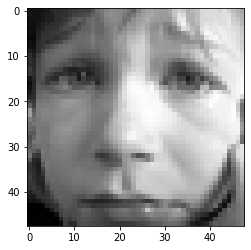

In [20]:
#fer2013_features.iloc[1]
#visualizing an image from the training dataset
numpy_im = np.mat(fer2013_train_features.pixels[6]).reshape(48,48)
print(numpy_im.shape)
plt.imshow(numpy_im,cmap='gray')
plt.show() 

Data augmentation of the same image with variations in width, height, zoom, horizontal flip, and shear

In [21]:

from keras.preprocessing.image import ImageDataGenerator
import cv2

#augmenting data using ImageDataGenerator to augment data in real-time while training
data_generator = ImageDataGenerator(rotation_range=20,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=0.1,
                        fill_mode='nearest',
                        shear_range=0.1,
                        horizontal_flip=True)


Here you can see the data augmentation applied to get variations in the same image of the toddler that was dispalyed above

(1, 48, 48, 1)


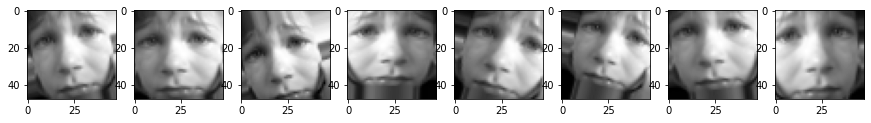

In [22]:
#visualizing data augmentations for a single image from the training set
img = np.expand_dims(X_train[6],0)
print(img.shape)
train_data1 = data_generator.flow(img,batch_size = 1)
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(15,15))


for i in range(8):
    image = next(train_data1).reshape(48,48)
    #print("shape is",image.shape)
 
    # plot the augmented images
    ax[i].imshow(image,cmap='gray')

In [23]:
data_generator.fit(X_train)
train_data = data_generator.flow(X_train,y_train,batch_size = 64)

One-hot encoding training labels

In [24]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)


one-hot-encoding testing labels

In [25]:
#y_train
y_test = to_categorical(y_test)
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [26]:
X_train.shape
y_train.shape

(28709, 7)

The following code for Compact Convolutional Transformer was taken from https://keras.io/examples/vision/cct/. Only the parameters were changed while experimenting to adapt to the FER2013 dataset

Hyperparameters and constants

In [27]:
positional_emb = True
conv_layers = 2
projection_dim = 128

num_heads = 2
transformer_units = [
    projection_dim,
    projection_dim,]
transformer_layers = 2
stochastic_depth_rate = 0.1

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 64
num_epochs = 50
image_size = 48

In [28]:
num_classes = 7
input_shape = (48, 48, 1)

In [29]:
class CCTTokenizer(layers.Layer):
    def __init__(
        self,
        kernel_size=3,
        stride=1,
        padding=1,
        pooling_kernel_size=3,
        pooling_stride=2,
        num_conv_layers=conv_layers,
        num_output_channels=[64, 128],
        positional_emb=positional_emb,
        **kwargs,
    ):
        super(CCTTokenizer, self).__init__(**kwargs)

        # This is our tokenizer.
        self.conv_model = keras.Sequential()
        for i in range(num_conv_layers):
            self.conv_model.add(
                layers.Conv2D(
                    num_output_channels[i],
                    kernel_size,
                    stride,
                    padding="valid",
                    use_bias=False,
                    activation="relu",
                    kernel_initializer="he_normal",
                )
            )
            self.conv_model.add(layers.ZeroPadding2D(padding))
            self.conv_model.add(
                layers.MaxPool2D(pooling_kernel_size, pooling_stride, "same")
            )

        self.positional_emb = positional_emb

    def call(self, images):
        outputs = self.conv_model(images)
        # After passing the images through our mini-network the spatial dimensions
        # are flattened to form sequences.
        reshaped = tf.reshape(
            outputs,
            (-1, tf.shape(outputs)[1] * tf.shape(outputs)[2], tf.shape(outputs)[-1]),
        )
        return reshaped

    def positional_embedding(self, image_size):
        # Positional embeddings are optional in CCT. Here, we calculate
        # the number of sequences and initialize an `Embedding` layer to
        # compute the positional embeddings later.
        if self.positional_emb:
            dummy_inputs = tf.ones((1, image_size, image_size, 1))
            dummy_outputs = self.call(dummy_inputs)
            sequence_length = tf.shape(dummy_outputs)[1]
            projection_dim = tf.shape(dummy_outputs)[-1]

            embed_layer = layers.Embedding(
                input_dim=sequence_length, output_dim=projection_dim
            )
            return embed_layer, sequence_length
        else:
            return None

Stochastic depth for regularization(randomly drops a set of layers)

In [30]:
# Referred from: github.com:rwightman/pytorch-image-models.
class StochasticDepth(layers.Layer):
    def __init__(self, drop_prop, **kwargs):
        super(StochasticDepth, self).__init__(**kwargs)
        self.drop_prob = drop_prop

    def call(self, x, training=None):
        if training:
            keep_prob = 1 - self.drop_prob
            shape = (tf.shape(x)[0],) + (1,) * (len(tf.shape(x)) - 1)
            random_tensor = keep_prob + tf.random.uniform(shape, 0, 1)
            random_tensor = tf.floor(random_tensor)
            return (x / keep_prob) * random_tensor
        return x


MLP for the Transformers encoder

In [31]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [32]:
# Note the rescaling layer. These layers have pre-defined inference behavior.
data_augmentation = keras.Sequential(
    [
        layers.Rescaling(scale=1.0 / 255),
        layers.RandomCrop(image_size, image_size),
        layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.2)
    ],
    name="data_augmentation",
)

In [33]:

def create_cct_model(
    image_size=image_size,
    input_shape=input_shape,
    num_heads=num_heads,
    projection_dim=projection_dim,
    transformer_units=transformer_units,
):

    inputs = layers.Input(input_shape)

    # Augment data.
    augmented = data_augmentation(inputs)

    # Encode patches.
    cct_tokenizer = CCTTokenizer()
    encoded_patches = cct_tokenizer(augmented)

    # Apply positional embedding.
    if positional_emb:
        pos_embed, seq_length = cct_tokenizer.positional_embedding(image_size)
        positions = tf.range(start=0, limit=seq_length, delta=1)
        position_embeddings = pos_embed(positions)
        encoded_patches += position_embeddings

    # Calculate Stochastic Depth probabilities.
    dpr = [x for x in np.linspace(0, stochastic_depth_rate, transformer_layers)]

    # Create multiple layers of the Transformer block.
    for i in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)

        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Skip connection 1.
        attention_output = StochasticDepth(dpr[i])(attention_output)
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-5)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)

        # Skip connection 2.
        x3 = StochasticDepth(dpr[i])(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Apply sequence pooling.
    representation = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)
    attention_weights = tf.nn.softmax(layers.Dense(1)(representation), axis=1)
    weighted_representation = tf.matmul(
        attention_weights, representation, transpose_a=True
    )
    weighted_representation = tf.squeeze(weighted_representation, -2)

    # Classify outputs.
    logits = layers.Dense(num_classes)(weighted_representation)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [34]:
X_test.shape

(3589, 48, 48, 1)

Model training and evaluation

In [35]:

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.0001)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(from_logits= True, label_smoothing=0.1),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy"),
            keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
            ],
    )
    # earlystop = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1e-4, restore_best_weights=True)
    # lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-7)
    checkpoint_filepath = "model.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    model.summary()
    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.2,
        callbacks=[checkpoint_callback],
    )
    # history = model.fit_generator(data_generator.flow(X_train,y_train,batch_size = 64),validation_data = (X_val,y_val),steps_per_epoch=len(X_train)//64,epochs=num_epochs,
    #                               callbacks=[checkpoint_callback])

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history




The code copied from Keras website ends here-----------

In [36]:
with tf.device("/gpu:0"):
  cct_model = create_cct_model()
  hist = run_experiment(cct_model)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 48, 48, 1)   0           ['input_1[0][0]']                
                                                                                                  
 cct_tokenizer (CCTTokenizer)   (None, 144, 128)     74304       ['data_augmentation[0][0]']      
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 144, 128)    0           ['cct_tokenizer[0][0]']          
 da)                                                                                          

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

plot for accuracy and loss

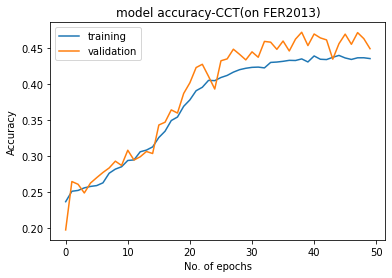

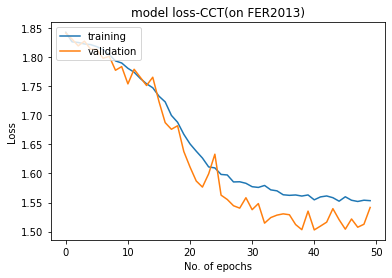

In [38]:

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy-CCT(on FER2013)')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss-CCT(on FER2013)')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')

plt.legend(['training', 'validation'], loc='upper left')
plt.show()